## Introduction

Apple Inc. is an American multinational corporation and technology company headquartered in Cupertino, California, in Silicon Valley. It is best known for its consumer electronics, software, and services.

In the financial market, due to various factors, the stock price fluctuation is universal. Therefore, the directional prediction of stock market price based on technical analysis is very important in stock investment.

In this notebook, we will be exploring and analyzing the Apple stock prices dataset.

In [5]:
##Import the requred libraries

from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Import csv file to colab

df = pd.read_csv('datasets_302666_618181_AAPL.csv',parse_dates=True)
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2018-08-15  209.220001  210.740005  208.330002  210.240005  207.027420   
1  2018-08-16  211.750000  213.809998  211.470001  213.320007  210.060333   
2  2018-08-17  213.440002  217.949997  213.160004  217.580002  214.255234   
3  2018-08-20  218.100006  219.179993  215.110001  215.460007  212.167633   
4  2018-08-21  216.800003  217.190002  214.029999  215.039993  211.754028   

     Volume  
0  28807600  
1  28500400  
2  35427000  
3  30287700  
4  26159800

In [8]:
# Setting dates as the Index

df['Time_Stamp'] = pd.to_datetime(df['Date'])
df_model = df.set_index('Time_Stamp')
df_model.drop(['Date'], axis=1, inplace=True)
df_model.tail()

Open        High         Low       Close   Adj Close  \
Time_Stamp                                                               
2019-08-08  200.199997  203.529999  199.389999  203.429993  202.659988   
2019-08-09  201.300003  202.759995  199.289993  200.990005  200.990005   
2019-08-12  199.619995  202.050003  199.149994  200.479996  200.479996   
2019-08-13  201.020004  212.139999  200.479996  208.970001  208.970001   
2019-08-14  203.160004  206.440002  202.589996  202.750000  202.750000   

              Volume  
Time_Stamp            
2019-08-08  27009500  
2019-08-09  24619700  
2019-08-12  22474900  
2019-08-13  47218500  
2019-08-14  36453100

In [13]:
df_model.shape

(251, 7)

In [30]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [19]:
rcParams['figure.figsize'] = 15,8

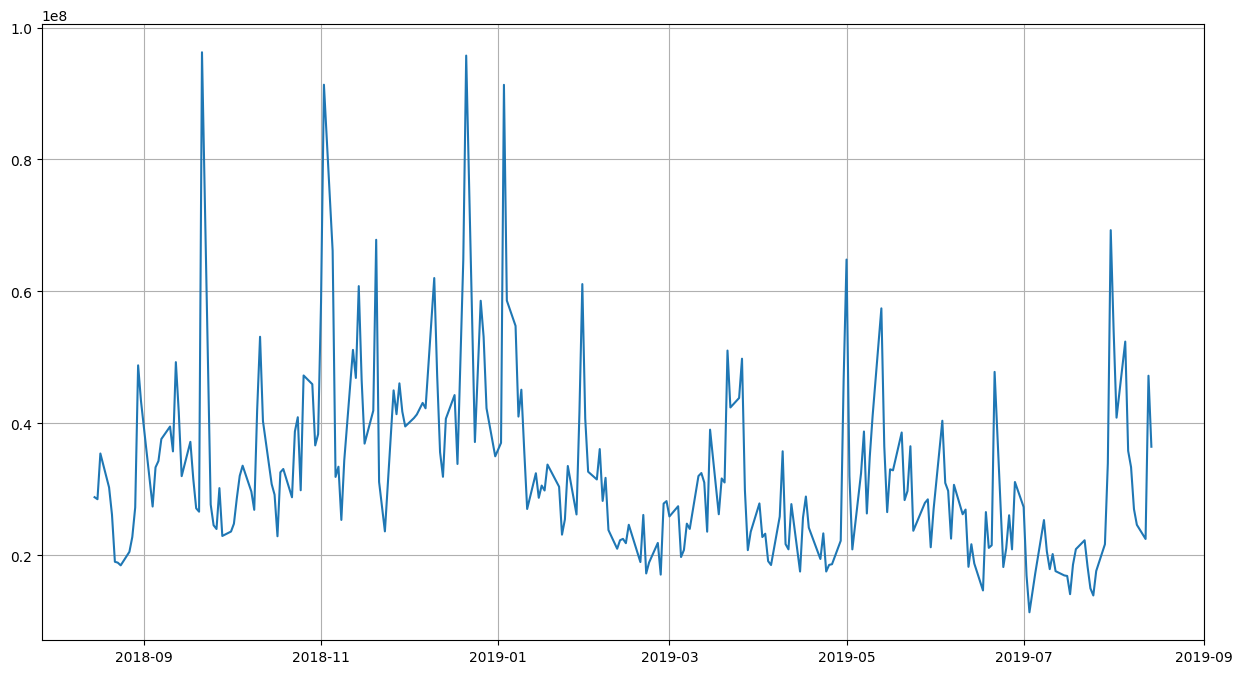

In [37]:
plt.plot(df_model.index,df['Volume']);
plt.grid()

In [32]:
df_model.describe().T

count          mean           std           min           25%  \
Open       251.0  1.928570e+02  2.178733e+01  1.439800e+02  1.748050e+02   
High       251.0  1.949449e+02  2.195608e+01  1.457200e+02  1.759350e+02   
Low        251.0  1.908957e+02  2.170733e+01  1.420000e+02  1.735550e+02   
Close      251.0  1.929419e+02  2.177736e+01  1.421900e+02  1.747950e+02   
Adj Close  251.0  1.911120e+02  2.136935e+01  1.405058e+02  1.733661e+02   
Volume     251.0  3.289967e+07  1.385336e+07  1.136200e+07  2.329740e+07   

                    50%           75%           max  
Open       1.964200e+02  2.090550e+02  2.307800e+02  
High       1.988500e+02  2.106900e+02  2.334700e+02  
Low        1.938200e+02  2.071550e+02  2.297800e+02  
Close      1.970000e+02  2.089050e+02  2.320700e+02  
Adj Close  1.955015e+02  2.077606e+02  2.285238e+02  
Volume     2.985580e+07  3.927970e+07  9.624670e+07

Yearly Plot

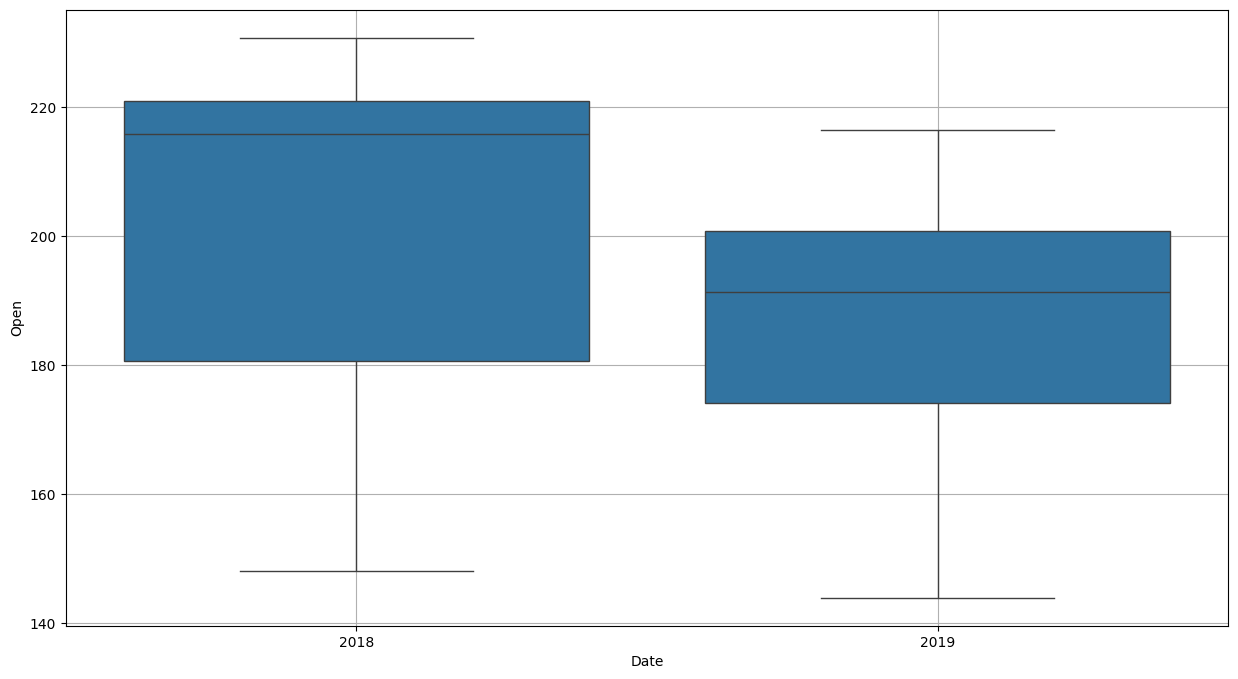

In [27]:
sns.boxplot(x = df_model.index.year,y = df['Open'])
plt.grid();

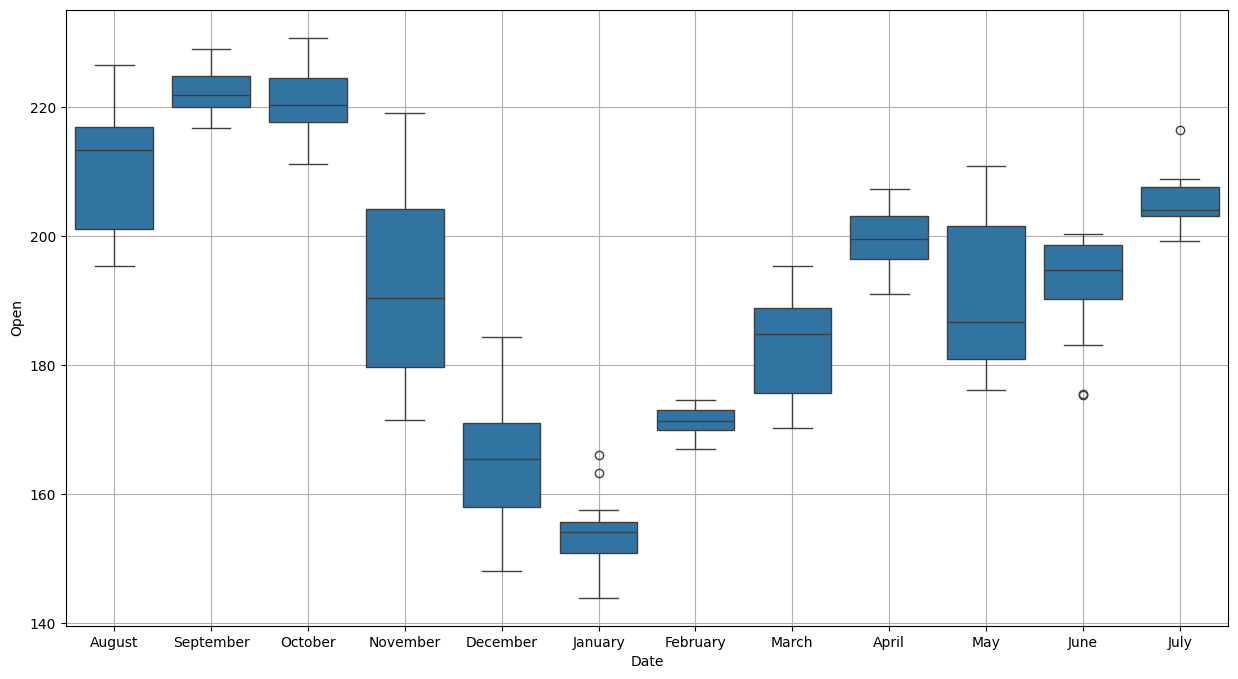

In [28]:
sns.boxplot(x = df_model.index.month_name(),y = df['Open'])
plt.grid();

## Decompose the 'Volume' variable

In [38]:
df_model.drop(columns = ['Open','High','Low','Close','Adj Close',],inplace=True)

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

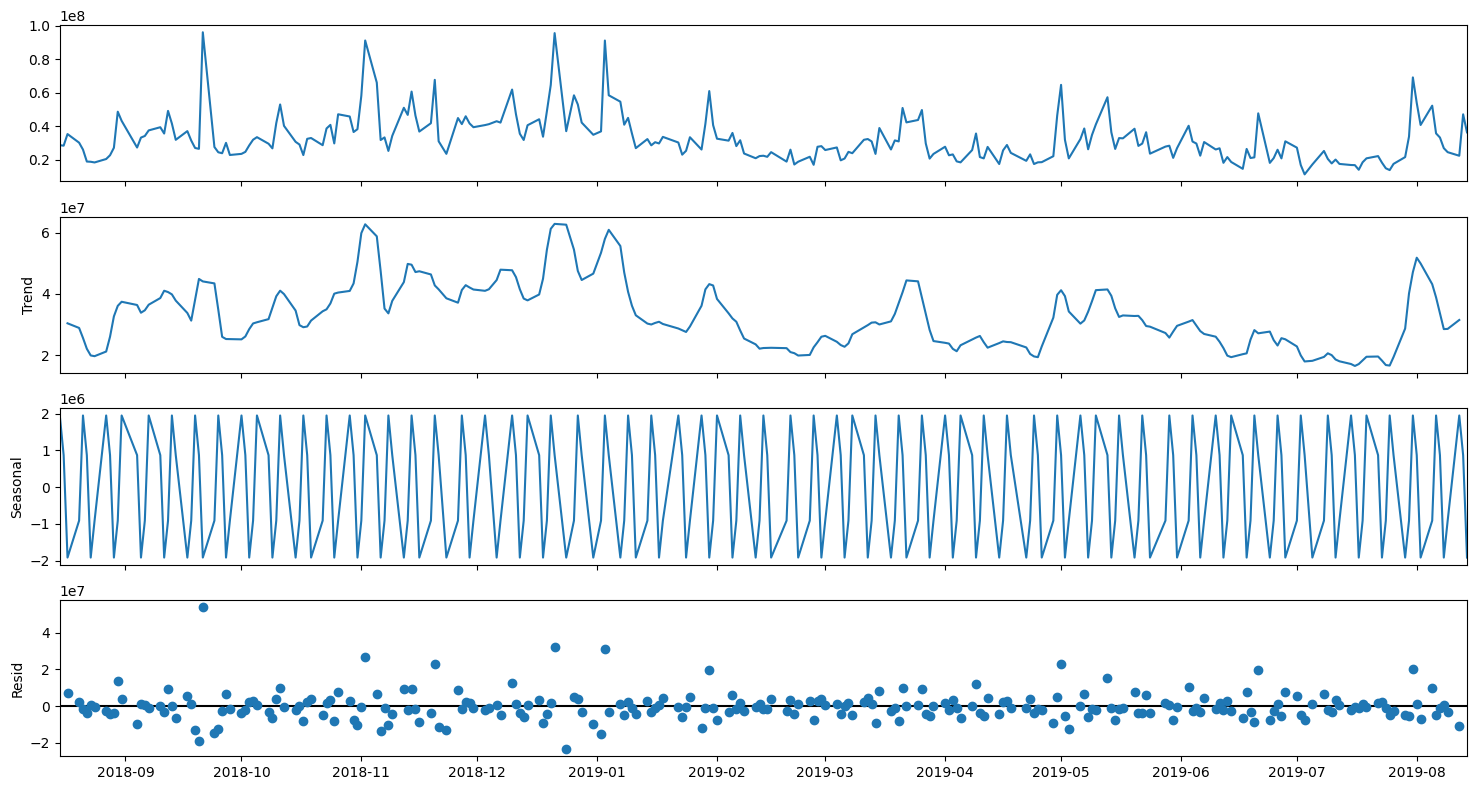

In [42]:
decomposition = seasonal_decompose(df_model,model='additive', period = 4)
decomposition.plot();

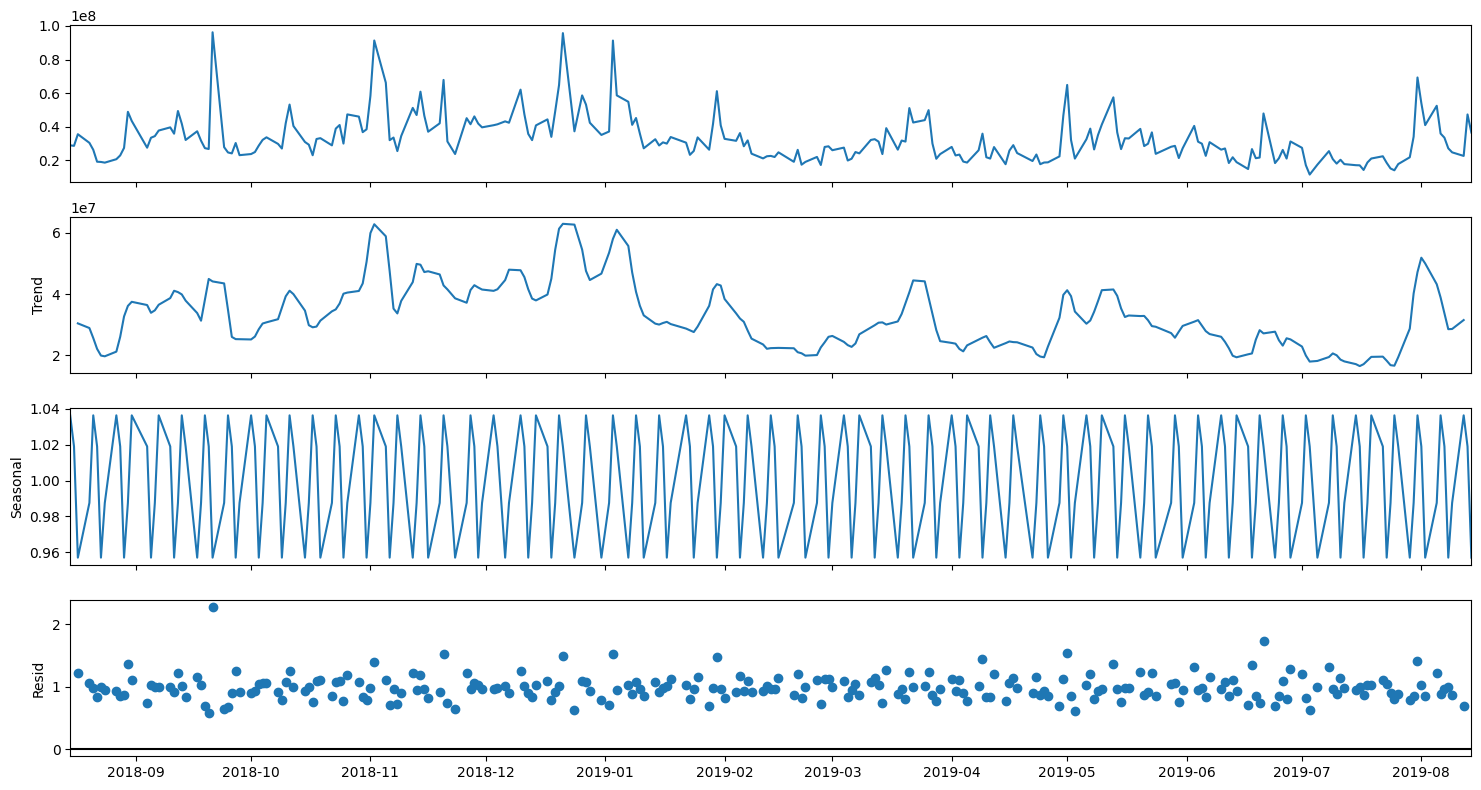

In [43]:
decomposition = seasonal_decompose(df_model,model='multiplicative', period = 4,)
decomposition.plot();

So series is Additive

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
                 Volume
Time_Stamp            
2018-08-15         NaN
2018-08-16         NaN
2018-08-17  29836500.0
2018-08-20  27878600.0
2018-08-21  25955160.0
2018-08-22  22565040.0
2018-08-23  20612520.0
2018-08-24  19935920.0
2018-08-27  21583260.0
2018-08-28  27565380.0
2018-08-29  32538120.0
2018-08-30  33911120.0 

Seasonality 
               Volume
Time_Stamp          
2018-08-15  0.991134
2018-08-16  1.057854
2018-08-17  0.974697
2018-08-20  1.013504
2018-08-21  0.962811
2018-08-22  0.991134
2018-08-23  1.057854
2018-08-24  0.974697
2018-08-27  1.013504
2018-08-28  0.962811
2018-08-29  0.991134
2018-08-30  1.057854 

Residual 
               Volume
Time_Stamp          
2018-08-15       NaN
2018-08-16       NaN
2018-08-17  1.218195
2018-08-20  1.071939
2018-08-21  1.046814
2018-08-22  0.850352
2018-08-23  0.866002
2018-08-24  0.950848
2018-08-27  0.938302
2018-08-28  0.858198
2018-08-29  0.845120
2018-08-30  1.360181 



In [ ]:
# Split the data into training and test set before building the models.

In [ ]:
### We will consider the original dataset and subseqeuntly we would require exogeneous variables

df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df.head()
df.tail()

Date        Open        High  ...   Adj Close    Volume  Time_Stamp
246  2019-08-08  200.199997  203.529999  ...  202.659988  27009500  2019-08-08
247  2019-08-09  201.300003  202.759995  ...  200.990005  24619700  2019-08-09
248  2019-08-12  199.619995  202.050003  ...  200.479996  22474900  2019-08-12
249  2019-08-13  201.020004  212.139999  ...  208.970001  47218500  2019-08-13
250  2019-08-14  203.160004  206.440002  ...  202.750000  36453100  2019-08-14

[5 rows x 8 columns]

In [9]:
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df_final_model = df.set_index('Time_Stamp')
df_final_model.drop(['Date'], axis=1, inplace=True)
df_final_model

Open        High         Low       Close   Adj Close  \
Time_Stamp                                                               
2018-08-15  209.220001  210.740005  208.330002  210.240005  207.027420   
2018-08-16  211.750000  213.809998  211.470001  213.320007  210.060333   
2018-08-17  213.440002  217.949997  213.160004  217.580002  214.255234   
2018-08-20  218.100006  219.179993  215.110001  215.460007  212.167633   
2018-08-21  216.800003  217.190002  214.029999  215.039993  211.754028   
...                ...         ...         ...         ...         ...   
2019-08-08  200.199997  203.529999  199.389999  203.429993  202.659988   
2019-08-09  201.300003  202.759995  199.289993  200.990005  200.990005   
2019-08-12  199.619995  202.050003  199.149994  200.479996  200.479996   
2019-08-13  201.020004  212.139999  200.479996  208.970001  208.970001   
2019-08-14  203.160004  206.440002  202.589996  202.750000  202.750000   

              Volume  
Time_Stamp            
2018-08-15  28807600  
2018-08-16  28500400  
2018-08-17  35427000  
2018-08-20  30287700  
2018-08-21  26159800  
...              ...  
2019-08-08  27009500  
2019-08-09  24619700  
2019-08-12  22474900  
2019-08-13  47218500  
2019-08-14  36453100  

[251 rows x 6 columns]

In [10]:
# Getting the Month and Year as a avariable

df_final_model['Month'] = df_final_model.index.month
df_final_model['Year'] = df_final_model.index.year
df_final_model.head()

Open        High         Low       Close   Adj Close  \
Time_Stamp                                                               
2018-08-15  209.220001  210.740005  208.330002  210.240005  207.027420   
2018-08-16  211.750000  213.809998  211.470001  213.320007  210.060333   
2018-08-17  213.440002  217.949997  213.160004  217.580002  214.255234   
2018-08-20  218.100006  219.179993  215.110001  215.460007  212.167633   
2018-08-21  216.800003  217.190002  214.029999  215.039993  211.754028   

              Volume  Month  Year  
Time_Stamp                         
2018-08-15  28807600      8  2018  
2018-08-16  28500400      8  2018  
2018-08-17  35427000      8  2018  
2018-08-20  30287700      8  2018  
2018-08-21  26159800      8  2018

In [11]:
df_final_model.tail()

Open        High         Low       Close   Adj Close  \
Time_Stamp                                                               
2019-08-08  200.199997  203.529999  199.389999  203.429993  202.659988   
2019-08-09  201.300003  202.759995  199.289993  200.990005  200.990005   
2019-08-12  199.619995  202.050003  199.149994  200.479996  200.479996   
2019-08-13  201.020004  212.139999  200.479996  208.970001  208.970001   
2019-08-14  203.160004  206.440002  202.589996  202.750000  202.750000   

              Volume  Month  Year  
Time_Stamp                         
2019-08-08  27009500      8  2019  
2019-08-09  24619700      8  2019  
2019-08-12  22474900      8  2019  
2019-08-13  47218500      8  2019  
2019-08-14  36453100      8  2019

In [13]:
# Split the series into train and test

train= df_final_model[pd.to_datetime(df_final_model.index) < pd.to_datetime('2019-06-14')]
train.shape

(208, 8)

In [14]:
test= df_final_model[pd.to_datetime(df_final_model.index) >= pd.to_datetime('2019-06-14')]
test.shape

(43, 8)

In [15]:


train_final = train[['Volume']]
test_final=test[['Volume']]

## Check for stationarity of the series at $\alpha$ = 0.05 using appropriate statistical tests.

In [18]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    plt.figure(figsize=(12,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

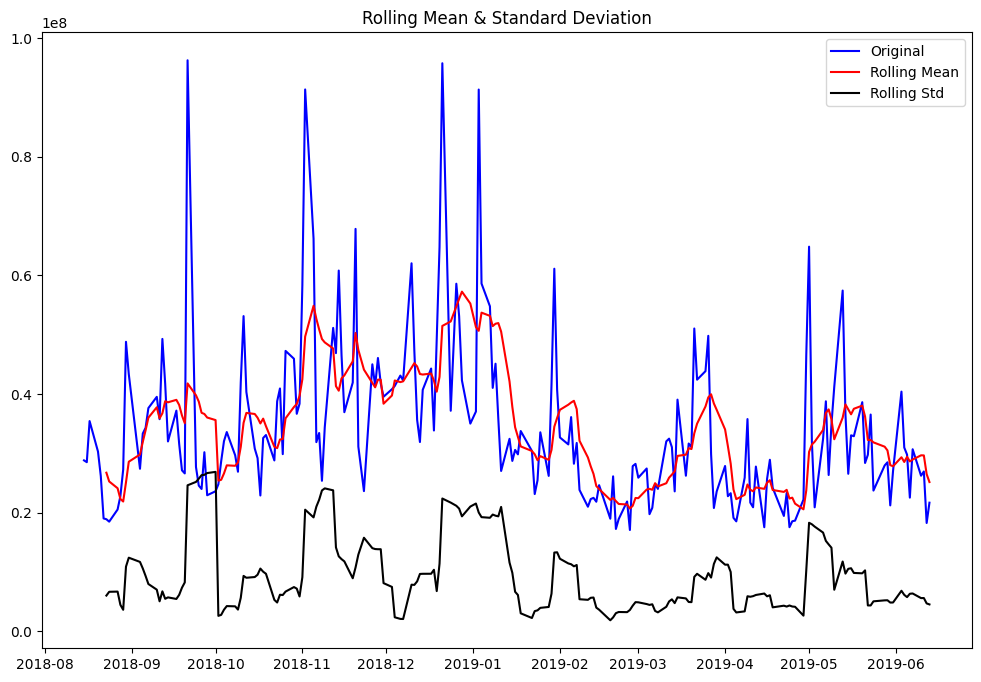

Results of Dickey-Fuller Test:
Test Statistic                  -2.864792
p-value                          0.049598
#Lags Used                       6.000000
Number of Observations Used    201.000000
Critical Value (1%)             -3.463309
Critical Value (5%)             -2.876029
Critical Value (10%)            -2.574493
dtype: float64 



In [19]:
test_stationarity(train_final['Volume'])

In [ ]:
## Series is stationary at 5% Alpha as per Dicky Fuller

In [ ]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


## Building an ARIMA model.

In [ ]:
# Creating an empty Dataframe with column names only
dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj

Empty DataFrame
Columns: [param, AIC]
Index: []

In [ ]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train_final['Volume'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj = dfObj.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

ARIMA(0, 0, 0) - AIC:7429.532057941741
ARIMA(0, 0, 1) - AIC:7384.221256038322
ARIMA(0, 0, 2) - AIC:7378.115357469763
ARIMA(1, 0, 0) - AIC:7372.073212600576
ARIMA(1, 0, 1) - AIC:7373.158386281623
ARIMA(1, 0, 2) - AIC:7365.800378313473
ARIMA(2, 0, 0) - AIC:7373.694123850221
ARIMA(2, 0, 1) - AIC:7367.025493618648


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(2, 0, 2) - AIC:7367.695589547626


In [ ]:
dfObj.sort_values(by=['AIC'])

param          AIC
5  (1, 0, 2)  7365.800378
7  (2, 0, 1)  7367.025494
8  (2, 0, 2)  7367.695590
3  (1, 0, 0)  7372.073213
4  (1, 0, 1)  7373.158386
6  (2, 0, 0)  7373.694124
2  (0, 0, 2)  7378.115357
1  (0, 0, 1)  7384.221256
0  (0, 0, 0)  7429.532058

In [ ]:
## ARIMA(1,0,2) has the lowest AIC
mod = ARIMA(train_final['Volume'], order=(1,0,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  208
Model:                     ARMA(1, 2)   Log Likelihood               -3677.900
Method:                       css-mle   S.D. of innovations       11548148.348
Date:                Thu, 16 Jul 2020   AIC                           7365.800
Time:                        07:08:23   BIC                           7382.488
Sample:                             0   HQIC                          7372.548
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.434e+07    3.2e+06     10.747      0.000    2.81e+07    4.06e+07
ar.L1.Volume     0.9467      0.040     23.526      0.000       0.868       1.026
ma.L1.Volume    -0.5244      0.080     -6.52

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
final_hat_avg =test_final.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test_final))
pred_ARIMA[0]

array([27318011.3155574 , 28687493.74263881, 28988372.55395678,
       29273223.72201566, 29542901.03026174, 29798212.78158242,
       30039924.2210297 , 30268759.82948666, 30485405.49515152,
       30690510.56934803, 30884689.81282402, 31068525.23837173,
       31242567.85529276, 31407339.32093641, 31563333.50426149,
       31711017.96610811, 31850835.36061615, 31983204.7619911 ,
       32108522.92059371, 32227165.45211853, 32339487.96342556,
       32445827.1183995 , 32546501.64703126, 32641813.30074631,
       32732047.75684321, 32817475.47475317, 32898352.50668728,
       32974921.26510085, 33047411.24927549, 33116039.73319653,
       33181012.41678759, 33242524.0424543 , 33300758.97878501,
       33355891.77315819, 33408087.67491264, 33457503.13064884,
       33504286.25314577, 33548577.26529886, 33590508.92040961,
       33630206.90008661, 33667790.19095059, 33703371.44127262,
       33737057.29861442])

In [ ]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test_final.Volume,pred_ARIMA[0]))
print(rmse)

13416731.648817554


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(1, 0, 2)'])

resultsDf

Test RMSE
ARIMA(1, 0, 2)  1.341673e+07

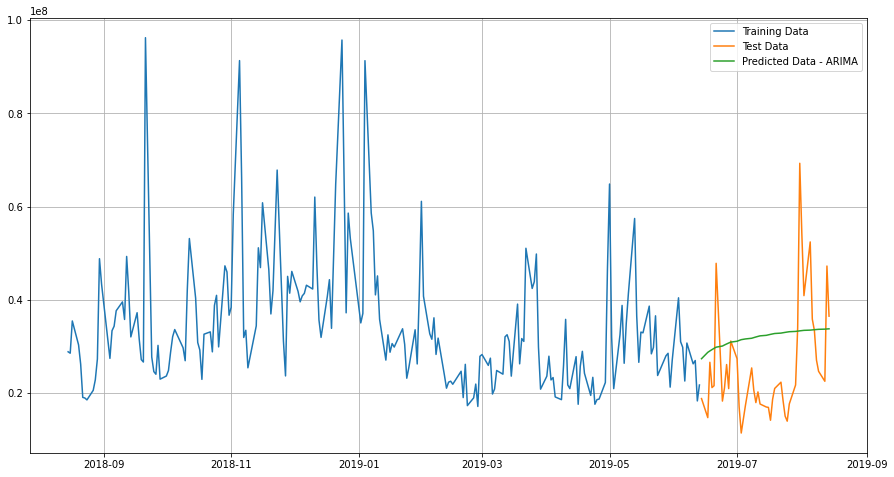

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

## Building a SARIMA model

In [ ]:
### As the dataset has seasonality.. Let's build the model with SARIMA
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:7803.902158390863
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:7516.843047531702
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:7311.014474314488
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:7335.756112170122
SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:7240.848774197256
SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:7067.255496879527
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:7120.87452132768
SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:7101.754037207329


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:7069.848627478223
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:7643.9036180653375
SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:7432.84822447339
SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:7241.9785539531085
SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:7482.677398931117


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:7401.246131356329
SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:7218.723683044125
SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:7295.362488980223


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:7293.113004755289


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:7220.030979839377
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:7579.195547009649
SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:7385.3770988294455


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:7200.696127783084
SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:7486.688579677626
SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:7368.855765239872


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:7186.083308218637
SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:7299.850035871196
SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:7297.331773703547


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:7187.3728859705625
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:7387.116568320252
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:7215.043134007794
SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:7041.005271647404
SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:7215.058330973905


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:7195.442027579005
SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:7022.169522872697


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:7040.7971336923165


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:7022.177154221714


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:7023.007446136632
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:7312.772230019045
SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:7137.525815354398


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:6961.28661838855
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:7173.041387860915


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:7146.181150426525


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:6969.473297817768
SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:7000.578933632827


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:6998.987729924851


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:6968.955371936698
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:7263.7066586037945
SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:7091.746463126796


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:6914.849774619028
SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:7161.423922966984


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:7104.688066618465


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:6929.774699550137


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:6989.311207136966


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:6987.858384671109


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:6924.302971600127
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:7340.223467609073
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:7202.27762275512


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:7028.933671101029
SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:7167.83535150285


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:7161.057783640954


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:7022.512854883903
SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:6990.399041050346


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:6982.574014079499


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:6983.068932807817
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:7768.710938347198


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:7439.568538413595
SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:7218.866853189047
SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:7127.425976176037


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:7129.419216734399
SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:6965.284736246713
SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:7032.859554958197


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:6964.018596078101


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:6960.322175370556
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:7265.50312612412
SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:7092.752413446571


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:6916.638386953451


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:7127.9113494794565


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:7105.977989745283


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:6931.614277901171


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:6952.429104210976


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:6953.661041504552
SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:6926.058673632066


In [ ]:
dfObj2.sort_values(by=['AIC'])

param      seasonal          AIC
47  (1, 0, 2)  (0, 0, 2, 5)  6914.849775
74  (2, 0, 2)  (0, 0, 2, 5)  6916.638387
53  (1, 0, 2)  (2, 0, 2, 5)  6924.302972
80  (2, 0, 2)  (2, 0, 2, 5)  6926.058674
50  (1, 0, 2)  (1, 0, 2, 5)  6929.774700
..        ...           ...          ...
1   (0, 0, 0)  (0, 0, 1, 5)  7516.843048
18  (0, 0, 2)  (0, 0, 0, 5)  7579.195547
9   (0, 0, 1)  (0, 0, 0, 5)  7643.903618
63  (2, 0, 1)  (0, 0, 0, 5)  7768.710938
0   (0, 0, 0)  (0, 0, 0, 5)  7803.902158

[81 rows x 3 columns]

In [ ]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:6914.849775
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'],
                                order=(1,0,2),
                                seasonal_order=(0,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                 Statespace Model Results                                
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3451.425
Date:                           Thu, 16 Jul 2020   AIC                           6914.850
Time:                                   07:09:47   BIC                           6934.488
Sample:                                        0   HQIC                          6922.801
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9984      0.004    225.761      0.000       0.990       1.007
ma.L1         -0.5660      0.056    -10.019

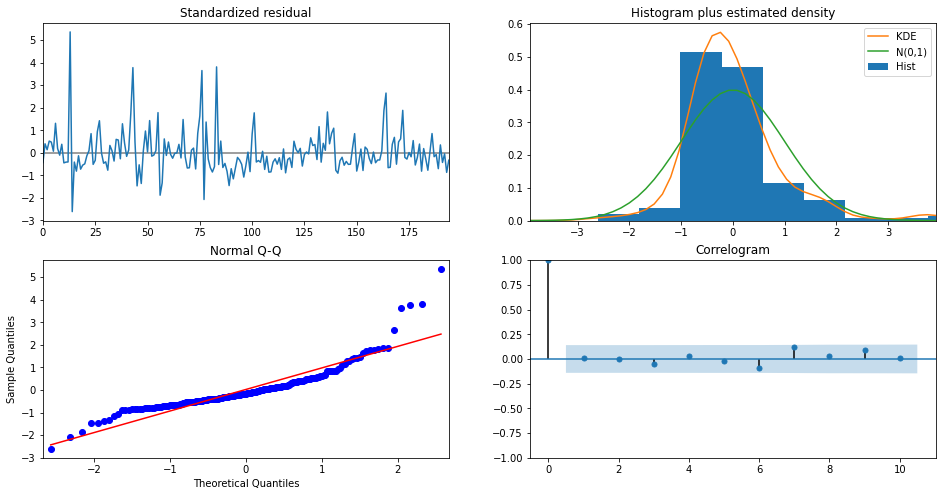

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
final_hat_avg =test_final.copy()
pred_SARIMA = results.get_forecast(steps=len(test_final))
pred_SARIMA.predicted_mean

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208    2.551381e+07
209    2.511483e+07
210    2.604913e+07
211    2.665672e+07
212    2.748693e+07
213    2.606237e+07
214    2.666852e+07
215    2.646147e+07
216    2.755161e+07
217    2.723870e+07
218    2.655759e+07
219    2.638244e+07
220    2.633968e+07
221    2.629700e+07
222    2.625438e+07
223    2.621184e+07
224    2.616936e+07
225    2.612695e+07
226    2.608461e+07
227    2.604234e+07
228    2.600014e+07
229    2.595801e+07
230    2.591594e+07
231    2.587394e+07
232    2.583201e+07
233    2.579015e+07
234    2.574836e+07
235    2.570663e+07
236    2.566497e+07
237    2.562338e+07
238    2.558186e+07
239    2.554040e+07
240    2.549901e+07
241    2.545769e+07
242    2.541644e+07
243    2.537525e+07
244    2.533413e+07
245    2.529307e+07
246    2.525208e+07
247    2.521116e+07
248    2.517031e+07
249    2.512952e+07
250    2.508879e+07
dtype: float64

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final.Volume,pred_SARIMA.predicted_mean))
print(rmse)

12585991.92647607


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(1, 0, 2)(0, 0, 2)5'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)             1.341673e+07
SARIMA(1, 0, 2)(0, 0, 2)5  1.258599e+07

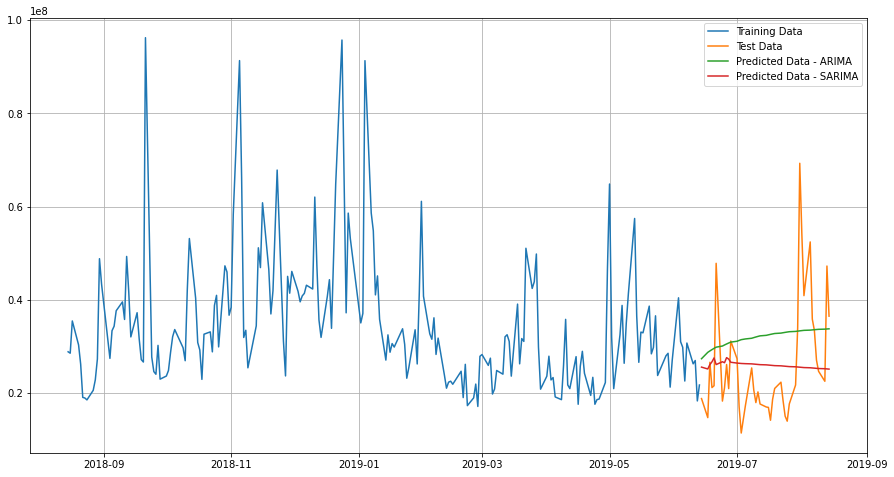

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [ ]:
## RMSE has reduced in comparison to ARIMA when seasonality was introduced

## Building a SARIMAX model.

In [ ]:
### Let's create exogeneous variables

ex_train=train[['High','Low']]
ex_test=test[['High','Low']]
ex_train.head()

High         Low
Time_Stamp                        
2018-08-15  210.740005  208.330002
2018-08-16  213.809998  211.470001
2018-08-17  217.949997  213.160004
2018-08-20  219.179993  215.110001
2018-08-21  217.190002  214.029999

In [ ]:
dfObj3 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj3

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
## Let's first use SARIMAX with exogenous variable
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'],exog=ex_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMAX = mod.fit()
        print('SARIMA{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        dfObj3 = dfObj3.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)(0, 0, 0, 5) - AIC:8220.439307896286
SARIMA(0, 0, 0)(0, 0, 1, 5) - AIC:7146.769049370061
SARIMA(0, 0, 0)(0, 0, 2, 5) - AIC:6973.675219174669
SARIMA(0, 0, 0)(1, 0, 0, 5) - AIC:7180.2060506566095
SARIMA(0, 0, 0)(1, 0, 1, 5) - AIC:7140.214862591105


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)(1, 0, 2, 5) - AIC:6969.373288041531
SARIMA(0, 0, 0)(2, 0, 0, 5) - AIC:7005.807851815782
SARIMA(0, 0, 0)(2, 0, 1, 5) - AIC:7003.438620304982


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)(2, 0, 2, 5) - AIC:6963.981257942771
SARIMA(0, 0, 1)(0, 0, 0, 5) - AIC:7266.466891877488
SARIMA(0, 0, 1)(0, 0, 1, 5) - AIC:7093.3148560488025
SARIMA(0, 0, 1)(0, 0, 2, 5) - AIC:6922.0549870105215


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)(1, 0, 0, 5) - AIC:7162.336463345246
SARIMA(0, 0, 1)(1, 0, 1, 5) - AIC:7091.6199091694425


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)(1, 0, 2, 5) - AIC:6920.715937319923
SARIMA(0, 0, 1)(2, 0, 0, 5) - AIC:6990.991123660684


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)(2, 0, 1, 5) - AIC:6990.361146714503


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)(2, 0, 2, 5) - AIC:6922.054949329938
SARIMA(0, 0, 2)(0, 0, 0, 5) - AIC:7228.873007460348
SARIMA(0, 0, 2)(0, 0, 1, 5) - AIC:7057.612581905888


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(0, 0, 2, 5) - AIC:6885.362025266866
SARIMA(0, 0, 2)(1, 0, 0, 5) - AIC:7161.072951167738
SARIMA(0, 0, 2)(1, 0, 1, 5) - AIC:7056.719525741494


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(1, 0, 2, 5) - AIC:6884.313069282176
SARIMA(0, 0, 2)(2, 0, 0, 5) - AIC:6990.075335097872


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(2, 0, 1, 5) - AIC:6989.613668100725


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(2, 0, 2, 5) - AIC:6885.781536515762
SARIMA(1, 0, 0)(0, 0, 0, 5) - AIC:7293.182651274299
SARIMA(1, 0, 0)(0, 0, 1, 5) - AIC:7122.563121480967
SARIMA(1, 0, 0)(0, 0, 2, 5) - AIC:6952.317767376766
SARIMA(1, 0, 0)(1, 0, 0, 5) - AIC:7122.49020572597


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

SARIMA(1, 0, 0)(1, 0, 1, 5) - AIC:7122.031664879007


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)(1, 0, 2, 5) - AIC:6951.560954188732
SARIMA(1, 0, 0)(2, 0, 0, 5) - AIC:6952.140641780625


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)(2, 0, 1, 5) - AIC:6951.601534353564


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)(2, 0, 2, 5) - AIC:6953.180227756312
SARIMA(1, 0, 1)(0, 0, 0, 5) - AIC:7251.074495835085


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(0, 0, 1, 5) - AIC:7079.076442227178


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(0, 0, 2, 5) - AIC:6908.765859949617
SARIMA(1, 0, 1)(1, 0, 0, 5) - AIC:7113.73537449248


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(1, 0, 1, 5) - AIC:7080.973702336023


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(1, 0, 2, 5) - AIC:6909.8497519766715


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(2, 0, 0, 5) - AIC:6943.266684073467


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(2, 0, 1, 5) - AIC:6945.085831796461


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(2, 0, 2, 5) - AIC:6902.482897246302
SARIMA(1, 0, 2)(0, 0, 0, 5) - AIC:7215.087510251136


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(0, 0, 1, 5) - AIC:7044.252186838272


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(0, 0, 2, 5) - AIC:6872.113320808347
SARIMA(1, 0, 2)(1, 0, 0, 5) - AIC:7113.0813118397145


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(1, 0, 1, 5) - AIC:7046.150409390186


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(1, 0, 2, 5) - AIC:6873.443826546398


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(2, 0, 0, 5) - AIC:6942.654368206211


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(2, 0, 1, 5) - AIC:6943.921974606954


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(2, 0, 2, 5) - AIC:6875.342422657094
SARIMA(2, 0, 0)(0, 0, 0, 5) - AIC:7257.838452716163
SARIMA(2, 0, 0)(0, 0, 1, 5) - AIC:7122.24621945308
SARIMA(2, 0, 0)(0, 0, 2, 5) - AIC:6952.326939853004


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)(1, 0, 0, 5) - AIC:7087.823597805568
SARIMA(2, 0, 0)(1, 0, 1, 5) - AIC:7087.97327057923


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)(1, 0, 2, 5) - AIC:6951.74874924
SARIMA(2, 0, 0)(2, 0, 0, 5) - AIC:6917.63738166412


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)(2, 0, 1, 5) - AIC:6917.262503452242
SARIMA(2, 0, 0)(2, 0, 2, 5) - AIC:6919.656666143941


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(0, 0, 0, 5) - AIC:7249.711589566405
SARIMA(2, 0, 1)(0, 0, 1, 5) - AIC:7078.615416995068


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(0, 0, 2, 5) - AIC:6908.150533238885
SARIMA(2, 0, 1)(1, 0, 0, 5) - AIC:7078.6581883617055


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(1, 0, 1, 5) - AIC:7080.544718804643


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(1, 0, 2, 5) - AIC:6909.40750332429


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(2, 0, 0, 5) - AIC:6908.070103705542


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(2, 0, 1, 5) - AIC:6909.342809218586


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(2, 0, 2, 5) - AIC:6911.280497768686
SARIMA(2, 0, 2)(0, 0, 0, 5) - AIC:7217.0817229051045
SARIMA(2, 0, 2)(0, 0, 1, 5) - AIC:7046.248715882774


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(0, 0, 2, 5) - AIC:6874.101786907818


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(1, 0, 0, 5) - AIC:7080.563353034616


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(1, 0, 1, 5) - AIC:7048.145505748045


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(1, 0, 2, 5) - AIC:6875.432041500011


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(2, 0, 0, 5) - AIC:6909.905612516948


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(2, 0, 1, 5) - AIC:6911.219587663107


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(2, 0, 2, 5) - AIC:6877.126945862574


In [ ]:
dfObj3.sort_values(by=['AIC'])

param      seasonal          AIC
47  (1, 0, 2)  (0, 0, 2, 5)  6872.113321
50  (1, 0, 2)  (1, 0, 2, 5)  6873.443827
74  (2, 0, 2)  (0, 0, 2, 5)  6874.101787
53  (1, 0, 2)  (2, 0, 2, 5)  6875.342423
77  (2, 0, 2)  (1, 0, 2, 5)  6875.432042
..        ...           ...          ...
36  (1, 0, 1)  (0, 0, 0, 5)  7251.074496
54  (2, 0, 0)  (0, 0, 0, 5)  7257.838453
9   (0, 0, 1)  (0, 0, 0, 5)  7266.466892
27  (1, 0, 0)  (0, 0, 0, 5)  7293.182651
0   (0, 0, 0)  (0, 0, 0, 5)  8220.439308

[81 rows x 3 columns]

In [ ]:
## SARIMAX(1, 0, 2)(0, 0, 2, 5)
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'],exog=ex_train,
                                order=(1 ,0,2),
                                seasonal_order=(0,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                 Statespace Model Results                                
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3428.057
Date:                           Thu, 16 Jul 2020   AIC                           6872.113
Time:                                   07:11:00   BIC                           6898.297
Sample:                                        0   HQIC                          6882.715
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
High        4.931e+06   1.12e+04    440.239      0.000    4.91e+06    4.95e+06
Low        -4.861e+06   1.07e+04   -453.858

In [ ]:
pred_SARIMAX = results.get_forecast(steps=len(test),exog=ex_test)
pred_SARIMAX.predicted_mean

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208    2.571915e+07
209    2.410398e+07
210    3.522159e+07
211    2.343603e+07
212    2.386817e+07
213    2.461335e+07
214    2.096945e+07
215    3.032390e+07
216    2.933217e+07
217    2.150483e+07
218    2.349456e+07
219    3.067138e+07
220    2.059985e+07
221    2.067717e+07
222    2.289184e+07
223    2.664731e+07
224    2.531933e+07
225    2.297016e+07
226    2.556402e+07
227    2.132532e+07
228    2.186047e+07
229    2.553564e+07
230    2.168311e+07
231    2.354546e+07
232    3.317088e+07
233    3.074738e+07
234    2.119482e+07
235    2.301054e+07
236    2.564040e+07
237    2.610916e+07
238    2.432124e+07
239    2.748937e+07
240    6.341158e+07
241    6.914651e+07
242    3.682375e+07
243    4.248725e+07
244    3.256582e+07
245    4.101602e+07
246    3.355014e+07
247    3.027081e+07
248    2.748064e+07
249    7.079823e+07
250    3.246375e+07
dtype: float64

In [ ]:
rmse = sqrt(mean_squared_error(test_final.Volume,pred_SARIMAX.predicted_mean))
print(rmse)

8368433.334756771


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMAX(1, 0, 2)(0, 0, 2)5'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)              1.341673e+07
SARIMA(1, 0, 2)(0, 0, 2)5   1.258599e+07
SARIMAX(1, 0, 2)(0, 0, 2)5  8.368433e+06

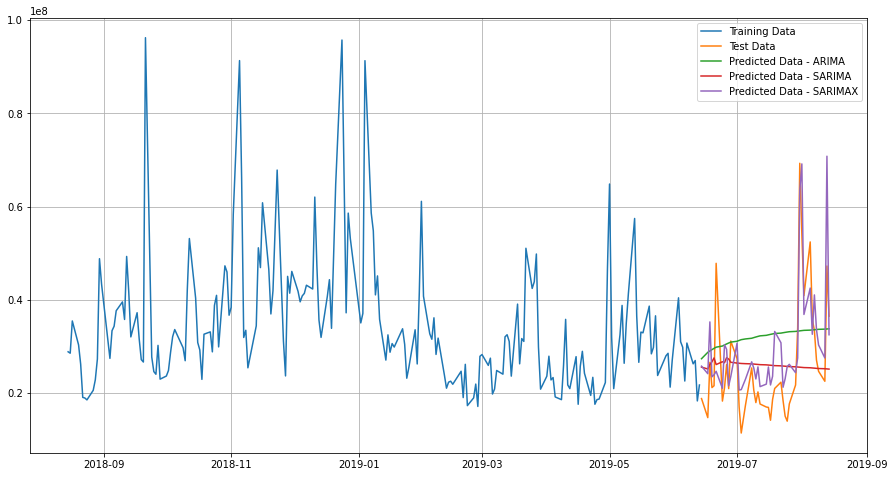

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();

## Building Time Series models using the Prophet Library.

In [ ]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(df['Date'])
df_prophet['y'] = df['Volume']
df_prophet['High']= df['High']
df_prophet['Low']=df['Low']
df_prophet.head()

ds         y        High         Low
0 2018-08-15  28807600  210.740005  208.330002
1 2018-08-16  28500400  213.809998  211.470001
2 2018-08-17  35427000  217.949997  213.160004
3 2018-08-20  30287700  219.179993  215.110001
4 2018-08-21  26159800  217.190002  214.029999

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


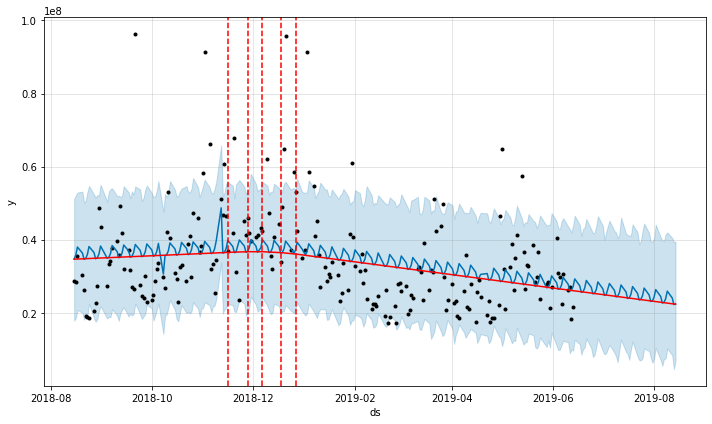

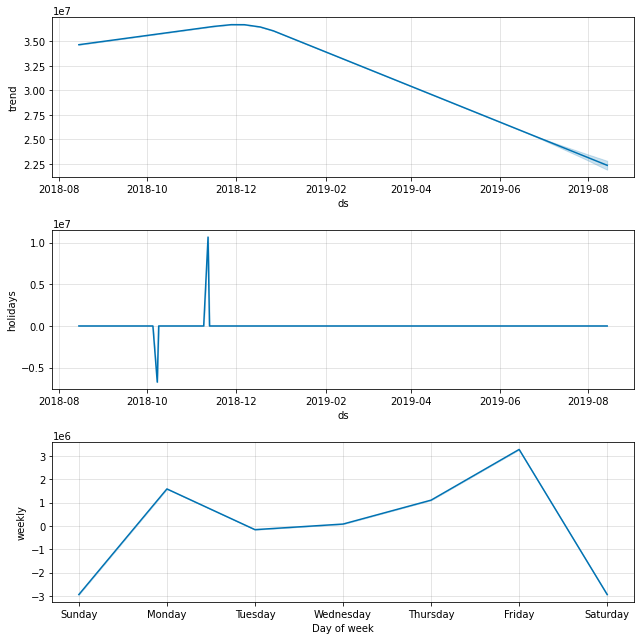

In [ ]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=True)
prophet.add_country_holidays(country_name='US')
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2019-06-13')])
future = prophet.make_future_dataframe(periods=43, freq=us_bd)
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

Prophet has included the original data as the black dots and the blue line is the forecast model.

The light blue area is the confidence interval. Using the add_changepoints_to_plot function added the red lines; the vertical dashed lines are changepoints Prophet identified where the trend changed, and the solid red line is the trend with all seasonality removed.


The components plot consists of 3 sections: the trend, the holidays, and the seasonality. The sum of those 3 components account for the entirety of the model in fact. The trend is simply what the data is showing if you subtract out all of the other components.

The holidays plot shows the effect of all of the holidays included in the model. Holidays, as implemented in Prophet, can be thought of as unnatural events when the trend will deviate from the baseline but return once the event is over.

The weekly seasonality component shows the change in volumne over
the week, but with a steep decline on the weekend.

In [ ]:
import holidays
for date, name in sorted(holidays.US(state='NY', years=2018).items()):
   print(date, name)

2018-01-01 New Year's Day
2018-01-15 Martin Luther King, Jr. Day
2018-02-12 Lincoln's Birthday
2018-02-15 Susan B. Anthony Day
2018-02-19 Washington's Birthday
2018-05-28 Memorial Day
2018-07-04 Independence Day
2018-09-03 Labor Day
2018-10-08 Columbus Day
2018-11-06 Election Day
2018-11-11 Veterans Day
2018-11-12 Veterans Day (Observed)
2018-11-22 Thanksgiving
2018-12-25 Christmas Day


In [ ]:
forecast

ds         trend  ...  multiplicative_terms_upper          yhat
0   2018-08-15  3.465833e+07  ...                         0.0  3.473734e+07
1   2018-08-16  3.467850e+07  ...                         0.0  3.578265e+07
2   2018-08-17  3.469867e+07  ...                         0.0  3.797591e+07
3   2018-08-20  3.475918e+07  ...                         0.0  3.634451e+07
4   2018-08-21  3.477936e+07  ...                         0.0  3.461878e+07
..         ...           ...  ...                         ...           ...
246 2019-08-07  2.275537e+07  ...                         0.0  2.283438e+07
247 2019-08-08  2.269563e+07  ...                         0.0  2.379978e+07
248 2019-08-09  2.263589e+07  ...                         0.0  2.591313e+07
249 2019-08-12  2.245668e+07  ...                         0.0  2.404201e+07
250 2019-08-13  2.239695e+07  ...                         0.0  2.223637e+07

[251 rows x 52 columns]

In [ ]:
rmse = sqrt(mean_squared_error(test_final['Volume'],forecast.tail(43)['yhat']))
print(rmse)

12826050.542675346


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)              1.341673e+07
SARIMA(1, 0, 2)(0, 0, 2)5   1.258599e+07
SARIMAX(1, 0, 2)(0, 0, 2)5  8.368433e+06
Prophet                     1.282605e+07
Prophet                     1.282605e+07

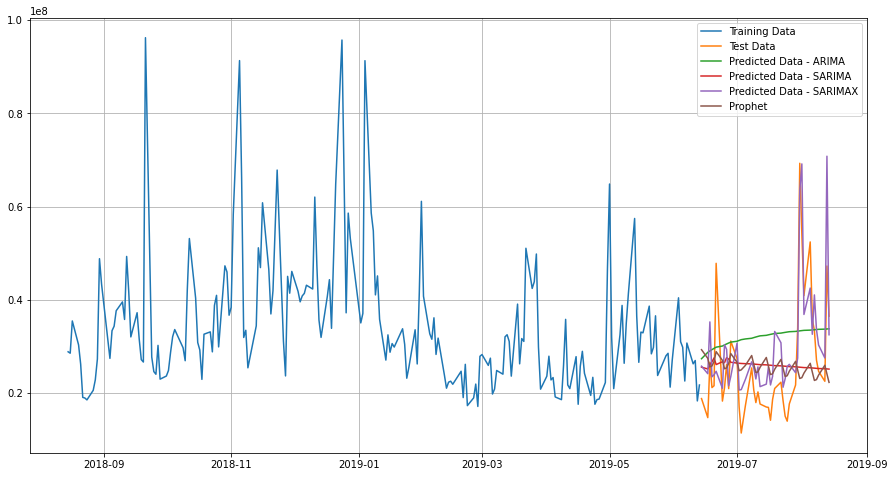

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet')
plt.legend(loc='best')
plt.grid();

Additional Regressor: If you have independent variables apart from the target forcasted variables, you can add thems as a regressor variables.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


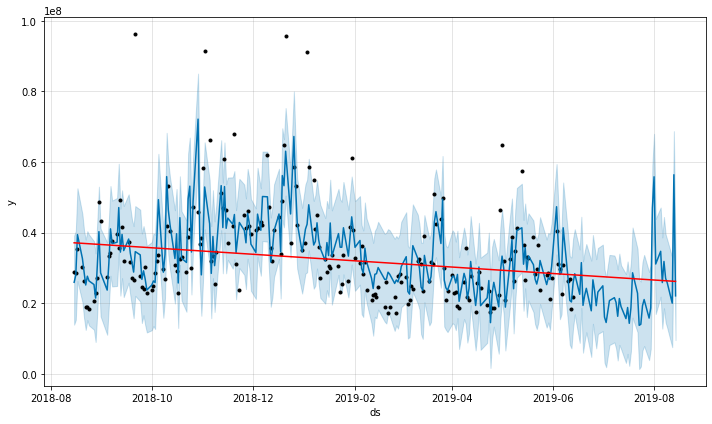

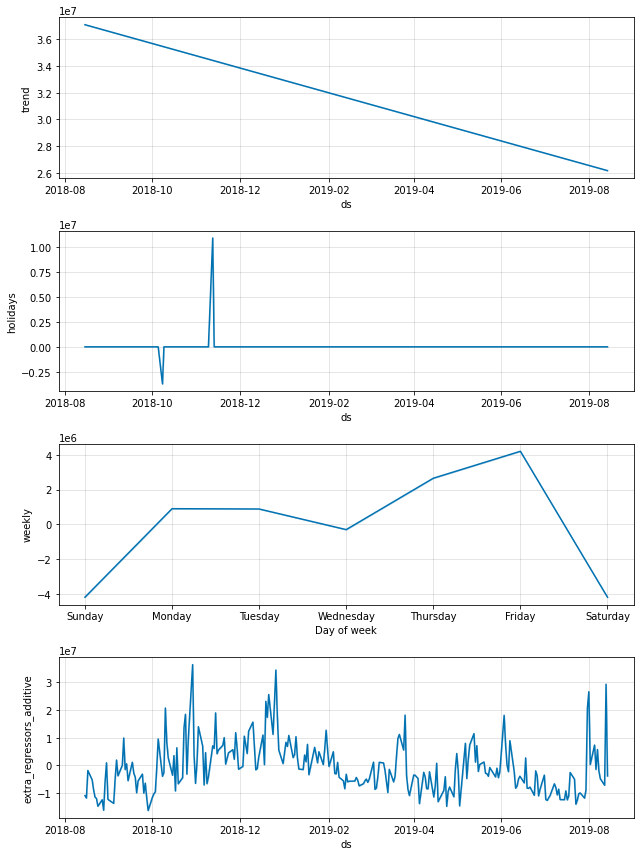

In [ ]:
prophet=Prophet()
prophet.add_country_holidays(country_name='US')
prophet.add_regressor('High')
prophet.add_regressor('Low')
prophet.fit(df_prophet[df_prophet['ds'] < pd.to_datetime('2019-06-14')])
future = prophet.make_future_dataframe(periods=43, freq=us_bd)
future['High']= df_prophet['High']
future['Low']= df_prophet['Low']
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()


In [ ]:
rmse = sqrt(mean_squared_error(test_final['Volume'],forecast.tail(43)['yhat']))
print(rmse)

7396603.465502088


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Prophet - with exog variables'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)                 1.341673e+07
SARIMA(1, 0, 2)(0, 0, 2)5      1.258599e+07
SARIMAX(1, 0, 2)(0, 0, 2)5     8.368433e+06
Prophet                        1.282605e+07
Prophet                        1.282605e+07
Prophet - with exog variables  7.396603e+06

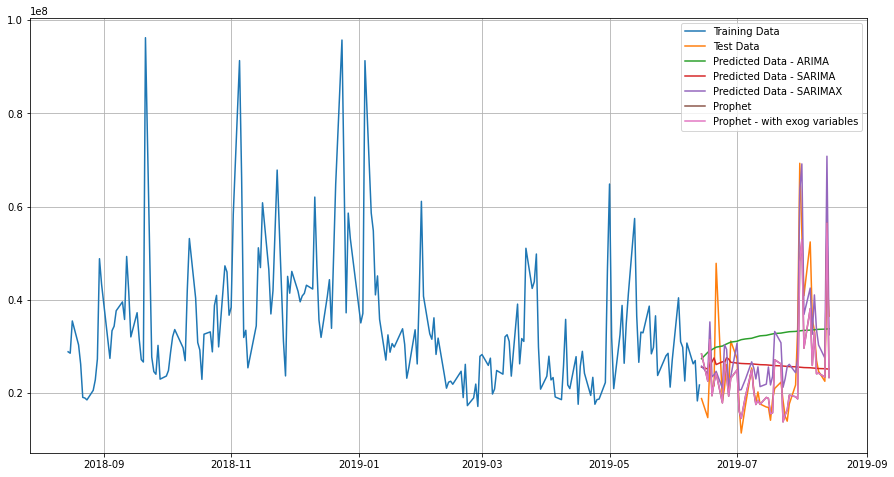

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet - with exog variables')
plt.legend(loc='best')
plt.grid();

Adjusting trend by changepoint_prior_scale: Prophet allow you to adjust the trend in case there is an overfit or underfit. changepoint_prior_scale helps adjust the strength of the trend.
Default value for changepoint_prior_scale is 0.05. Decrease the value to make the trend less flexible. Increase the value of changepoint_prior_scale to make the trend more flexible.
Increasing the changepoint_prior_scale to 0.08 to make the trend flexible


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


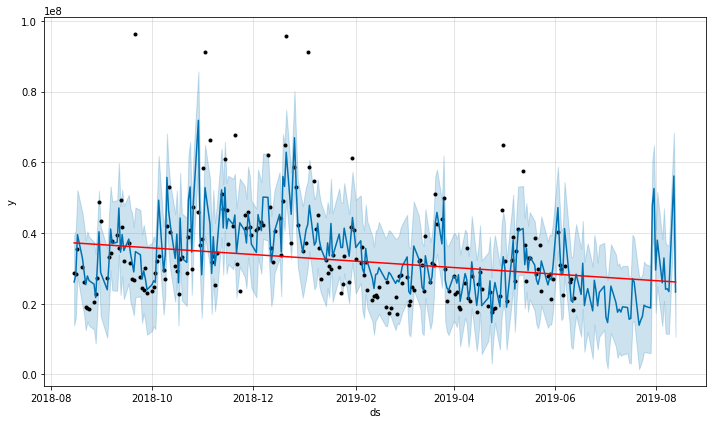

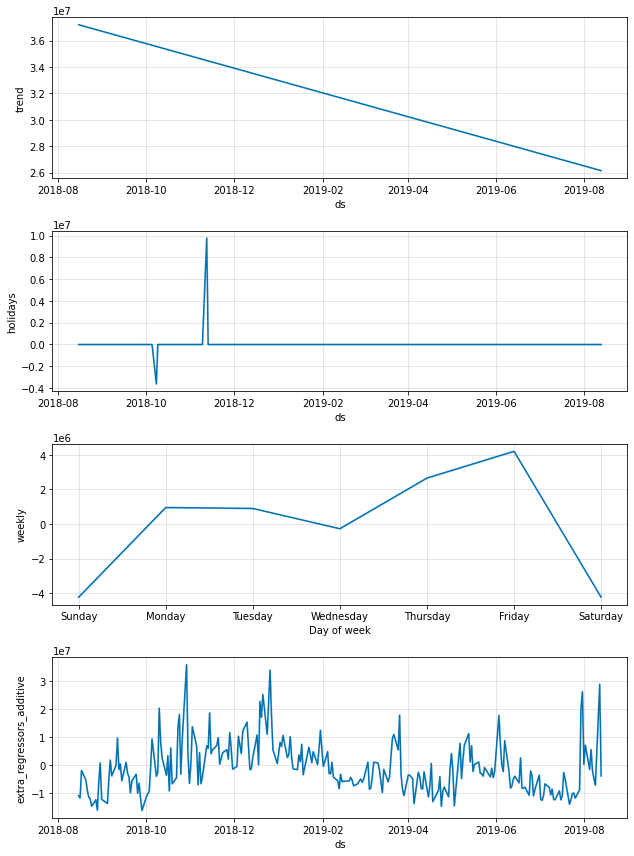

In [ ]:
prophet=Prophet(changepoint_prior_scale=.08,
                  )
prophet.add_country_holidays(country_name='US')
prophet.add_regressor('High')
prophet.add_regressor('Low')
prophet.fit(df_prophet[df_prophet['ds'] < pd.to_datetime('2019-06-14')])
future = prophet.make_future_dataframe(periods=43, freq=us_bd)
future['High']= df_prophet['High']
future['Low']= df_prophet['Low']
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()


In [ ]:
rmse = sqrt(mean_squared_error(test_final['Volume'],forecast.tail(43)['yhat']))
print(rmse)

7772606.532402773


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Prophet - with exog variables_2.0'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)                     1.341673e+07
SARIMA(1, 0, 2)(0, 0, 2)5          1.258599e+07
SARIMAX(1, 0, 2)(0, 0, 2)5         8.368433e+06
Prophet                            1.282605e+07
Prophet                            1.282605e+07
Prophet - with exog variables      7.396603e+06
Prophet - with exog variables_2.0  7.402250e+06
Prophet - with exog variables_2.0  7.772607e+06

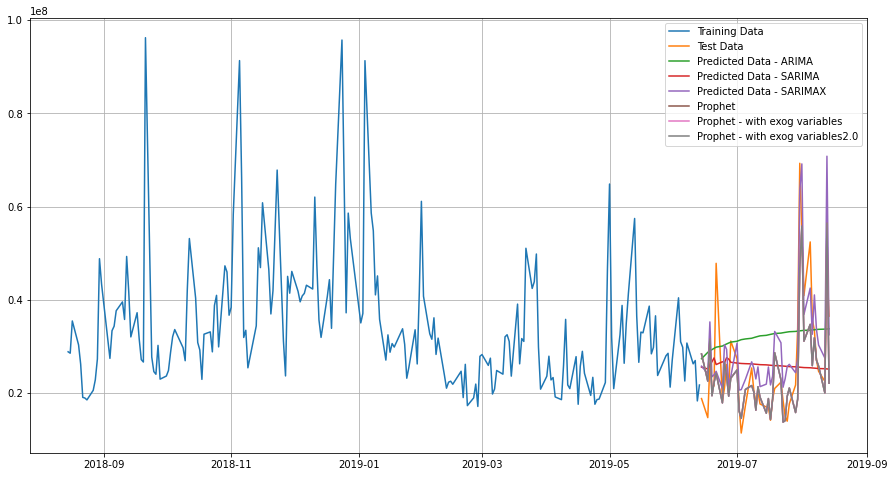

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet - with exog variables')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet - with exog variables2.0')
plt.legend(loc='best')
plt.grid();